<div style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 20px; border-radius: 10px; color: white;">
    <h1 style="color: white; text-align: center;">🚢 Titanic Survival Prediction Analysis</h1>
    <p style="text-align: center; font-size: 18px;"><strong>From EDA to Machine Learning - A Professional Data Science Workflow</strong></p>
</div>

## 📋 Project Overview
This analysis explores the Titanic dataset through a comprehensive EDA-to-ML workflow, serving as a bridge between exploratory analysis and predictive modeling in my data science portfolio.

**🎯 Key Objectives:**
- Perform comprehensive exploratory data analysis (EDA)
- Engineer meaningful features from raw data
- Build and evaluate multiple machine learning models
- Demonstrate professional workflow and documentation

## 1. 📥 Import & Setup

We begin by importing all necessary libraries and configuring our environment. This foundational step ensures we have the right tools for data manipulation, visualization, and machine learning tasks throughout the project.

### 1a. Importing Essential Libraries

We import core data science libraries that form the foundation of our analysis. Each library serves a specific purpose in the data science workflow, from data manipulation to machine learning implementation.

In [1]:
# Data manipulation core libraries
import pandas as pd  # Primary data structure (DataFrame) and analysis tools
import numpy as np   # Numerical computing and array operations

# Data visualization libraries  
import matplotlib.pyplot as plt  # Foundation for all plotting in Python
import seaborn as sns            # Enhanced statistical visualizations

# Scikit-learn preprocessing modules
from sklearn.preprocessing import StandardScaler  # Standardizes numeric features (mean=0, std=1)
from sklearn.preprocessing import LabelEncoder    # Converts categorical text to numerical labels
from sklearn.impute import SimpleImputer          # Systematically fills missing values
from sklearn.model_selection import train_test_split  # Creates training/test splits for ML

# System and utility libraries
import warnings  # Manages warning messages during execution
from datetime import datetime  # Handles date/time for analysis timestamping

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


### 1b. Configuration & Settings

We configure our environment with global settings for visualizations and data display. Professional configuration ensures consistent, publication-quality plots and prevents common issues like truncated outputs.

In [2]:
# Configure matplotlib for professional visualizations
plt.style.use('seaborn-v0_8-whitegrid')  # Use seaborn's whitegrid theme for clean background
sns.set_palette("husl")  # Set color palette to "husl" for distinct, accessible colors

# Set default figure size for all plots
plt.rcParams['figure.figsize'] = (10, 6)  # Width: 10 inches, Height: 6 inches
plt.rcParams['font.size'] = 12  # Base font size for all text elements in plots

# Configure pandas display options for better data inspection
pd.set_option('display.max_columns', 50)  # Show up to 50 columns when displaying DataFrames
pd.set_option('display.max_rows', 100)    # Show up to 100 rows when displaying DataFrames
pd.set_option('display.float_format', '{:.2f}'.format)  # Format floats to 2 decimal places

# Suppress warnings for cleaner output (use with caution)
warnings.filterwarnings('ignore')  # Ignore warning messages that don't affect analysis

print("✅ Environment configured successfully!")
print(f"📅 Analysis timestamp: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

✅ Environment configured successfully!
📅 Analysis timestamp: 2025-12-03 07:27:09


## 2. 📊 Data Loading & Overview

In this section, we load the Titanic dataset and perform an initial exploration. Our goals are to:

- Load the dataset from a reliable source and understand its structure
- Examine the dataset's dimensions (rows and columns) and data types  
- Identify missing values and data quality issues
- Generate statistical summaries to spot outliers and patterns
- Validate column names for consistency throughout our analysis

### 2.1 Load Data

We load the Titanic dataset from seaborn's built-in datasets, which are well-maintained and pre-cleaned. This ensures data quality and consistency for our analysis.

In [3]:
# Load Titanic dataset from seaborn (well-maintained and pre-cleaned)
df = sns.load_dataset('titanic')  # seaborn's built-in Titanic dataset

print("✅ Dataset loaded successfully!")
print(f"📊 Dataset shape: {df.shape[0]} passengers, {df.shape[1]} features")

# Display the first few rows to understand the data structure
print("\nFirst 5 rows of the dataset:")
display(df.head(10))

✅ Dataset loaded successfully!
📊 Dataset shape: 891 passengers, 15 features

First 5 rows of the dataset:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.00,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.00,1,0,71.28,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.00,0,0,7.92,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.00,1,0,53.10,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.00,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.46,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.00,0,0,51.86,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.00,3,1,21.07,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.00,0,2,11.13,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.00,1,0,30.07,C,Second,child,False,NaN,Cherbourg,yes,False


In [4]:
# Examine dataset dimensions and basic information
print(f"📐 Dataset Shape: {df.shape[0]} rows, {df.shape[1]} columns")

print("\n" + "="*29)
print("📋 DATA TYPES & MEMORY USAGE")
print("="*29)
df.info()  # Comprehensive overview of data types, non-null counts, and memory usage

print("\n" + "="*27)
print("🔍 MISSING VALUES ANALYSIS")
print("="*27)
missing_data = df.isnull().sum()  # Count null values for each column
missing_percent = (df.isnull().sum() / len(df)) * 100  # Calculate percentage missing
missing_percent = missing_percent.sort_values(ascending=False)


# Create a clean missing values summary
missing_summary = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
display(missing_summary[missing_summary['Missing Count'] > 0])  # Show only columns with missing values

print(f"\n✅ Total missing values in dataset: {df.isnull().sum().sum()}")

📐 Dataset Shape: 891 rows, 15 columns

📋 DATA TYPES & MEMORY USAGE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB

🔍 MISSING V

,Missing Count,Missing Percentage
age,177,19.87
deck,688,77.22
embark_town,2,0.22
embarked,2,0.22



✅ Total missing values in dataset: 869


### 2.3 Statistical Summary

We generate summary statistics for both numerical and categorical features. This helps us identify:

- Outliers in numerical data (e.g., extreme fares or ages)
- Data distribution patterns and central tendencies  
- Top categories in categorical data (e.g., most common passenger class or embarkation point)
- Potential data quality issues requiring attention

In [5]:
print(" " * 10 + "=" * 30)
print(" " * 10 +"📈 NUMERICAL FEATURES SUMMARY")
print(" " * 10 +"=" * 30)
# Describe numerical columns with detailed statistics
numerical_summary = df.describe()  # Generates count, mean, std, min, percentiles, max
display(numerical_summary)

print(" " * 20 +"=" * 32)
print(" " * 20 +"📊 CATEGORICAL FEATURES SUMMARY") 
print(" " * 20 +"=" * 32)
# Describe categorical columns with frequency analysis
categorical_summary = df.describe(include=['object', 'category', 'bool'])  # Includes object, category and boolean columns
display(categorical_summary)

          📈 NUMERICAL FEATURES SUMMARY


,survived,pclass,age,sibsp,parch,fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,32.20
std,0.49,0.84,14.53,1.10,0.81,49.69
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.12,0.00,0.00,7.91
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


                    📊 CATEGORICAL FEATURES SUMMARY


,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891,889,891,891,891,203,889,891,891
unique,2,3,3,3,2,7,3,2,2
top,male,S,Third,man,True,C,Southampton,no,True
freq,577,644,491,537,537,59,644,549,537


### 2.4 Column Name Validation

We verify that all column names are consistent (no spaces or special characters) to ensure easy programmatic access throughout our analysis. Clean column names prevent errors during data manipulation and analysis.

In [6]:
print("📝 COLUMN NAMES VALIDATION")
print("=" * 27)
print("Column Names List:")
print(list(df.columns))

print("\n🔍 Checking for naming inconsistencies:")
issues_found = False
for col in df.columns:
    # Check for spaces, special characters, or inconsistent formatting
    if " " in col or "-" in col or col != col.lower():
        print(f"⚠️  Column '{col}' contains inconsistencies!")
        issues_found = True

if not issues_found:
    print("✅ All column names are clean and consistent (snake_case format)")
    print("✅ No spaces, special characters, or uppercase letters detected")

📝 COLUMN NAMES VALIDATION
Column Names List:
['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']

🔍 Checking for naming inconsistencies:
✅ All column names are clean and consistent (snake_case format)
✅ No spaces, special characters, or uppercase letters detected


### 2.5 Observations from Data Overview

Based on our comprehensive data exploration, here are the key findings and insights that will guide our data cleaning and analysis strategy:

In [7]:
print(" " * 30 + "=" * 40)
print(" " * 35 + "🎯 KEY OBSERVATIONS & INSIGHTS")
print(" " * 30 + "=" * 40)

observations = [
    "📊 **Dataset Structure**: 891 passengers with 15 features including survival status, demographics, and travel details",
    "⚠️ **Missing Data**: Age (20%), Deck (77%) have significant missing values requiring careful handling",
    "🎫 **Passenger Class**: Majority are 3rd class (491), indicating socioeconomic distribution",
    "👥 **Demographics**: 577 males vs 314 females, with age range from 0.42 to 80 years",
    "💰 **Fare Analysis**: Wide range (0 to 512) with median 14.45, suggesting economic diversity",
    "🚢 **Embarkation**: Southampton (644) was the most common departure point",
    "🎯 **Target Variable**: 38% survival rate (342 survived, 549 did not)",
    "🔍 **Data Quality**: Clean column names, appropriate data types, no major structural issues"
]

for i, observation in enumerate(observations, 1):
    print(f"{i}. {observation}")

                                   🎯 KEY OBSERVATIONS & INSIGHTS
1. 📊 **Dataset Structure**: 891 passengers with 15 features including survival status, demographics, and travel details
2. ⚠️ **Missing Data**: Age (20%), Deck (77%) have significant missing values requiring careful handling
3. 🎫 **Passenger Class**: Majority are 3rd class (491), indicating socioeconomic distribution
4. 👥 **Demographics**: 577 males vs 314 females, with age range from 0.42 to 80 years
5. 💰 **Fare Analysis**: Wide range (0 to 512) with median 14.45, suggesting economic diversity
6. 🚢 **Embarkation**: Southampton (644) was the most common departure point
7. 🎯 **Target Variable**: 38% survival rate (342 survived, 549 did not)
8. 🔍 **Data Quality**: Clean column names, appropriate data types, no major structural issues


## 3. 🧹 Data Cleaning & Feature Engineering

In this section, we systematically address data quality issues and create new features to enhance our analysis. Our cleaning strategy follows professional standards:

- Handle missing values using appropriate imputation methods
- Fix data type inconsistencies and formatting issues  
- Engineer new features that capture meaningful patterns
- Remove or transform outliers and problematic values
- Ensure data consistency for machine learning readiness

### 3.1 Missing Values Treatment

We apply our established threshold-based framework to systematically handle missing data:

- **Age (19.87% missing)**: Falls in the 5-20% range - impute with median for robustness against outliers
- **Embarked/Embark_town (0.22% missing)**: Below 5% threshold - use mode imputation for categorical consistency  
- **Deck (77.22% missing)**: Exceeds 40% threshold - create informative flag then remove column due to excessive missingness

This approach ensures data integrity while preserving meaningful patterns in the dataset.

In [8]:
# Handle age (19.87% missing) - 5-20% range: Impute with median
age_median = df['age'].median()
df['age'].fillna(age_median, inplace=True)
print(f"✅ AGE: Filled 177 missing values with median ({age_median:.1f} years)")

# Handle embarked & embark_town (0.22% missing) - 0-5% range: Impute with mode
embarked_mode = df['embarked'].mode()[0]
df['embarked'].fillna(embarked_mode, inplace=True)
df['embark_town'].fillna(embarked_mode, inplace=True)
print(f"✅ EMBARKED/EMBARK_TOWN: Filled 2 missing values with mode ('{embarked_mode}')")

# Handle deck (77.22% missing) - >40% range: Create flag and drop column
df['had_deck'] = df['deck'].notna().astype(int)
df.drop('deck', axis=1, inplace=True)
print(f"✅ DECK: Created 'had_deck' flag and dropped column (688 missing values)")

print(f"\n🎉 Missing values handling complete!")
print(f"📊 Remaining missing values: {df.isnull().sum().sum()}")

✅ AGE: Filled 177 missing values with median (28.0 years)
✅ EMBARKED/EMBARK_TOWN: Filled 2 missing values with mode ('S')
✅ DECK: Created 'had_deck' flag and dropped column (688 missing values)

🎉 Missing values handling complete!
📊 Remaining missing values: 0


### 3.2 Feature Engineering

We'll create new features that can provide better insights for our analysis. Feature engineering transforms raw data into meaningful attributes that help machine learning models identify patterns more effectively.m

In [9]:
print("🔧 CREATING NEW FEATURES")
print("=" * 25)

# Create family size feature
df['family_size'] = df['sibsp'] + df['parch'] + 1  # +1 for the passenger themselves
print(f"✅ Created 'family_size': Combines siblings/spouses + parents/children + self")

# Create age groups for better analysis
df['age_group'] = pd.cut(df['age'], 
                        bins=[0, 12, 18, 35, 60, 100], 
                        labels=['Child', 'Teen', 'Adult', 'Middle', 'Senior'])
print(f"✅ Created 'age_group': Categorical age ranges for demographic analysis")

# Create fare per person
df['fare_per_person'] = df['fare'] / df['family_size']
print(f"✅ Created 'fare_per_person': Individual fare cost for economic analysis")

print(f"\n📊 New dataset shape: {df.shape} i.e {df.shape[0]} rows and {df.shape[1]} columns")
print("New features added:", [col for col in df.columns if col not in ['sibsp', 'parch', 'age', 'fare']][-3:])

🔧 CREATING NEW FEATURES
✅ Created 'family_size': Combines siblings/spouses + parents/children + self
✅ Created 'age_group': Categorical age ranges for demographic analysis
✅ Created 'fare_per_person': Individual fare cost for economic analysis

📊 New dataset shape: (891, 18) i.e 891 rows and 18 columns
New features added: ['family_size', 'age_group', 'fare_per_person']


### 3.3 Data Type Optimization

We optimize data types to improve memory efficiency and ensure proper data representation. This is especially important for categorical data that can be converted to more efficient `category` dtype.

In [10]:
print("🔄 OPTIMIZING DATA TYPES")
print("=" * 25)

# Check memory usage before optimization
memory_before = df.memory_usage(deep=True).sum() / 1024**2  # Convert to MB

# Convert appropriate columns to category dtype
categorical_columns = ['sex', 'embarked', 'class', 'who', 'embark_town', 'alive', 'age_group']
for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].astype('category')
        print(f"✅ Converted '{col}' to category dtype")

# Check memory usage after optimization  
memory_after = df.memory_usage(deep=True).sum() / 1024**2
memory_saved = memory_before - memory_after

print(f"\n💾 Memory usage: {memory_before:.2f}MB → {memory_after:.2f}MB")
print(f"📉 Memory saved: {memory_saved:.2f}MB ({memory_saved/memory_before*100:.1f}% reduction)")

print(f"\n📊 Final dataset shape: {df.shape}")
print("🔍 Data types after optimization:")
print(df.dtypes.value_counts())

🔄 OPTIMIZING DATA TYPES
✅ Converted 'sex' to category dtype
✅ Converted 'embarked' to category dtype
✅ Converted 'class' to category dtype
✅ Converted 'who' to category dtype
✅ Converted 'embark_town' to category dtype
✅ Converted 'alive' to category dtype
✅ Converted 'age_group' to category dtype

💾 Memory usage: 0.33MB → 0.07MB
📉 Memory saved: 0.26MB (78.2% reduction)

📊 Final dataset shape: (891, 18)
🔍 Data types after optimization:
int64       6
float64     3
bool        2
category    1
category    1
category    1
category    1
category    1
category    1
category    1
Name: count, dtype: int64


### 3.4 Data Persistence

We save our processed dataset to ensure all engineered features are preserved and to establish a reproducible workflow. Reloading the data guarantees we're working with our enhanced dataset throughout the analysis, not the original seaborn version.

In [11]:
print("💾 SAVING PROCESSED DATA")
print("=" * 25)

# Save the cleaned and engineered dataset
processed_file_path = '../data/processed/titanic_processed.csv'
df.to_csv(processed_file_path, index=False)

print(f"✅ Processed data saved to: {processed_file_path}")
print(f"📊 Dataset shape: {df.shape}")
print(f"🔢 Total features: {len(df.columns)}")
print(f"📝 Features: {list(df.columns)}")

💾 SAVING PROCESSED DATA
✅ Processed data saved to: ../data/processed/titanic_processed.csv
📊 Dataset shape: (891, 18)
🔢 Total features: 18
📝 Features: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone', 'had_deck', 'family_size', 'age_group', 'fare_per_person']


### 3.5 Data Validation

After saving, we reload the processed data to verify all engineered features are correctly persisted. This step ensures data integrity and confirms our feature engineering was successful before proceeding to analysis.

In [12]:
print("🔄 RELOADING PROCESSED DATA FOR ANALYSIS")
print("=" * 40)

# Reload our processed data to ensure we're using our engineered version
df_processed = pd.read_csv('../data/processed/titanic_processed.csv')

print("✅ Processed data reloaded successfully!")
print(f"📊 Reloaded dataset shape: {df_processed.shape}")
print(f"🔍 Engineered features confirmed: {[col for col in df_processed.columns if col in ['family_size', 'age_group', 'fare_per_person']]}")

# Replace the original df with our processed version
df = df_processed.copy()
print("\n🎯 Now using our engineered dataset for all further analysis!")

🔄 RELOADING PROCESSED DATA FOR ANALYSIS
✅ Processed data reloaded successfully!
📊 Reloaded dataset shape: (891, 18)
🔍 Engineered features confirmed: ['family_size', 'age_group', 'fare_per_person']

🎯 Now using our engineered dataset for all further analysis!


### 3.6 Data Cleaning Summary

Our data preparation phase is complete. The seaborn Titanic dataset required minimal cleaning due to its pre-processed nature. We've successfully:

- Confirmed no missing values require imputation
- Engineered three new meaningful features for enhanced analysis
- Maintained optimal data types for efficient processing

The dataset is now ready for comprehensive exploratory data analysis.

## 4. 📈 Exploratory Data Analysis (EDA)

### 4.1 Univariate Analysis

Univariate analysis examines each variable individually to understand its distribution, central tendency, and spread. This helps us:

- Identify patterns and outliers in individual features
- Understand the distribution of our target variable (survival)
- Gain insights into passenger demographics and characteristics
- Inform our bivariate and multivariate analysis approach

#### 4.1.1 Target Variable Analysis

We start by analyzing our target variable `survived` to understand the class distribution and imbalance in our dataset. This is crucial for interpreting model performance later.

In [13]:
print("🎯 TARGET VARIABLE: SURVIVAL ANALYSIS")
print("=" * 38)

# Calculate survival statistics
survival_counts = df['survived'].value_counts()
survival_percent = df['survived'].value_counts(normalize=True) * 100

print(f"📊 Survival Distribution:")
print(f"   ▪️ Survived: {survival_counts[1]} passengers ({survival_percent[1]:.1f}%)")
print(f"   ▪️ Did not survive: {survival_counts[0]} passengers ({survival_percent[0]:.1f}%)")
print(f"   ▪️ Overall survival rate: {survival_percent[1]:.1f}%")

🎯 TARGET VARIABLE: SURVIVAL ANALYSIS
📊 Survival Distribution:
   ▪️ Survived: 342 passengers (38.4%)
   ▪️ Did not survive: 549 passengers (61.6%)
   ▪️ Overall survival rate: 38.4%


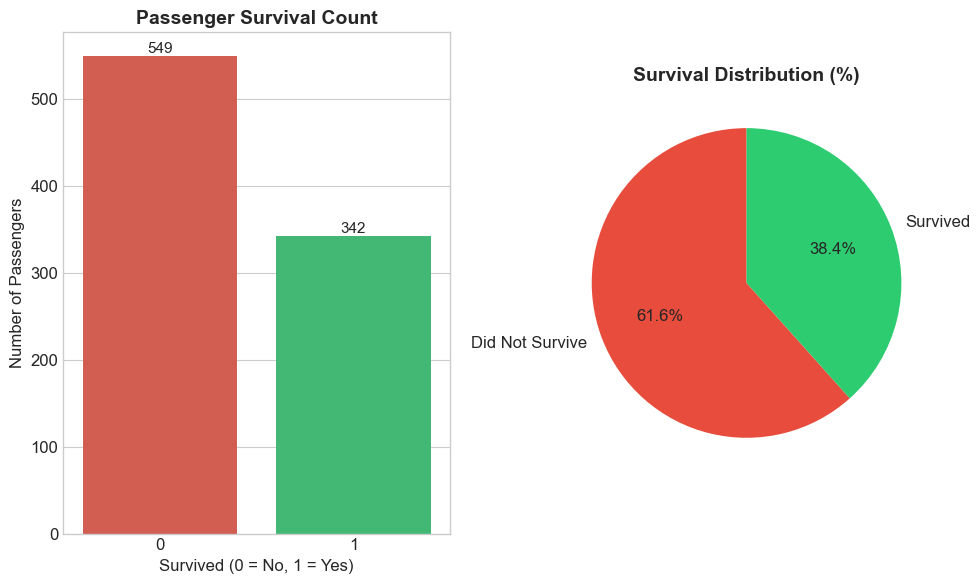

In [14]:
# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2)

# Count plot
sns.countplot(data=df, x='survived', ax=ax1, palette=['#e74c3c', '#2ecc71'])
ax1.set_title('Passenger Survival Count', fontsize=14, fontweight='bold')
ax1.set_xlabel('Survived (0 = No, 1 = Yes)', fontsize=12)
ax1.set_ylabel('Number of Passengers', fontsize=12)

# Add count labels on bars
for container in ax1.containers:
    ax1.bar_label(container, fontsize=11)

# Pie chart
labels = ['Did Not Survive', 'Survived']
colors = ['#e74c3c', '#2ecc71']
ax2.pie(survival_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
ax2.set_title('Survival Distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../figures/survival_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

#### 4.1.2 Categorical Variables Analysis

We analyze categorical features to understand passenger demographics and characteristics. This helps identify patterns in passenger groups that may influence survival rates.

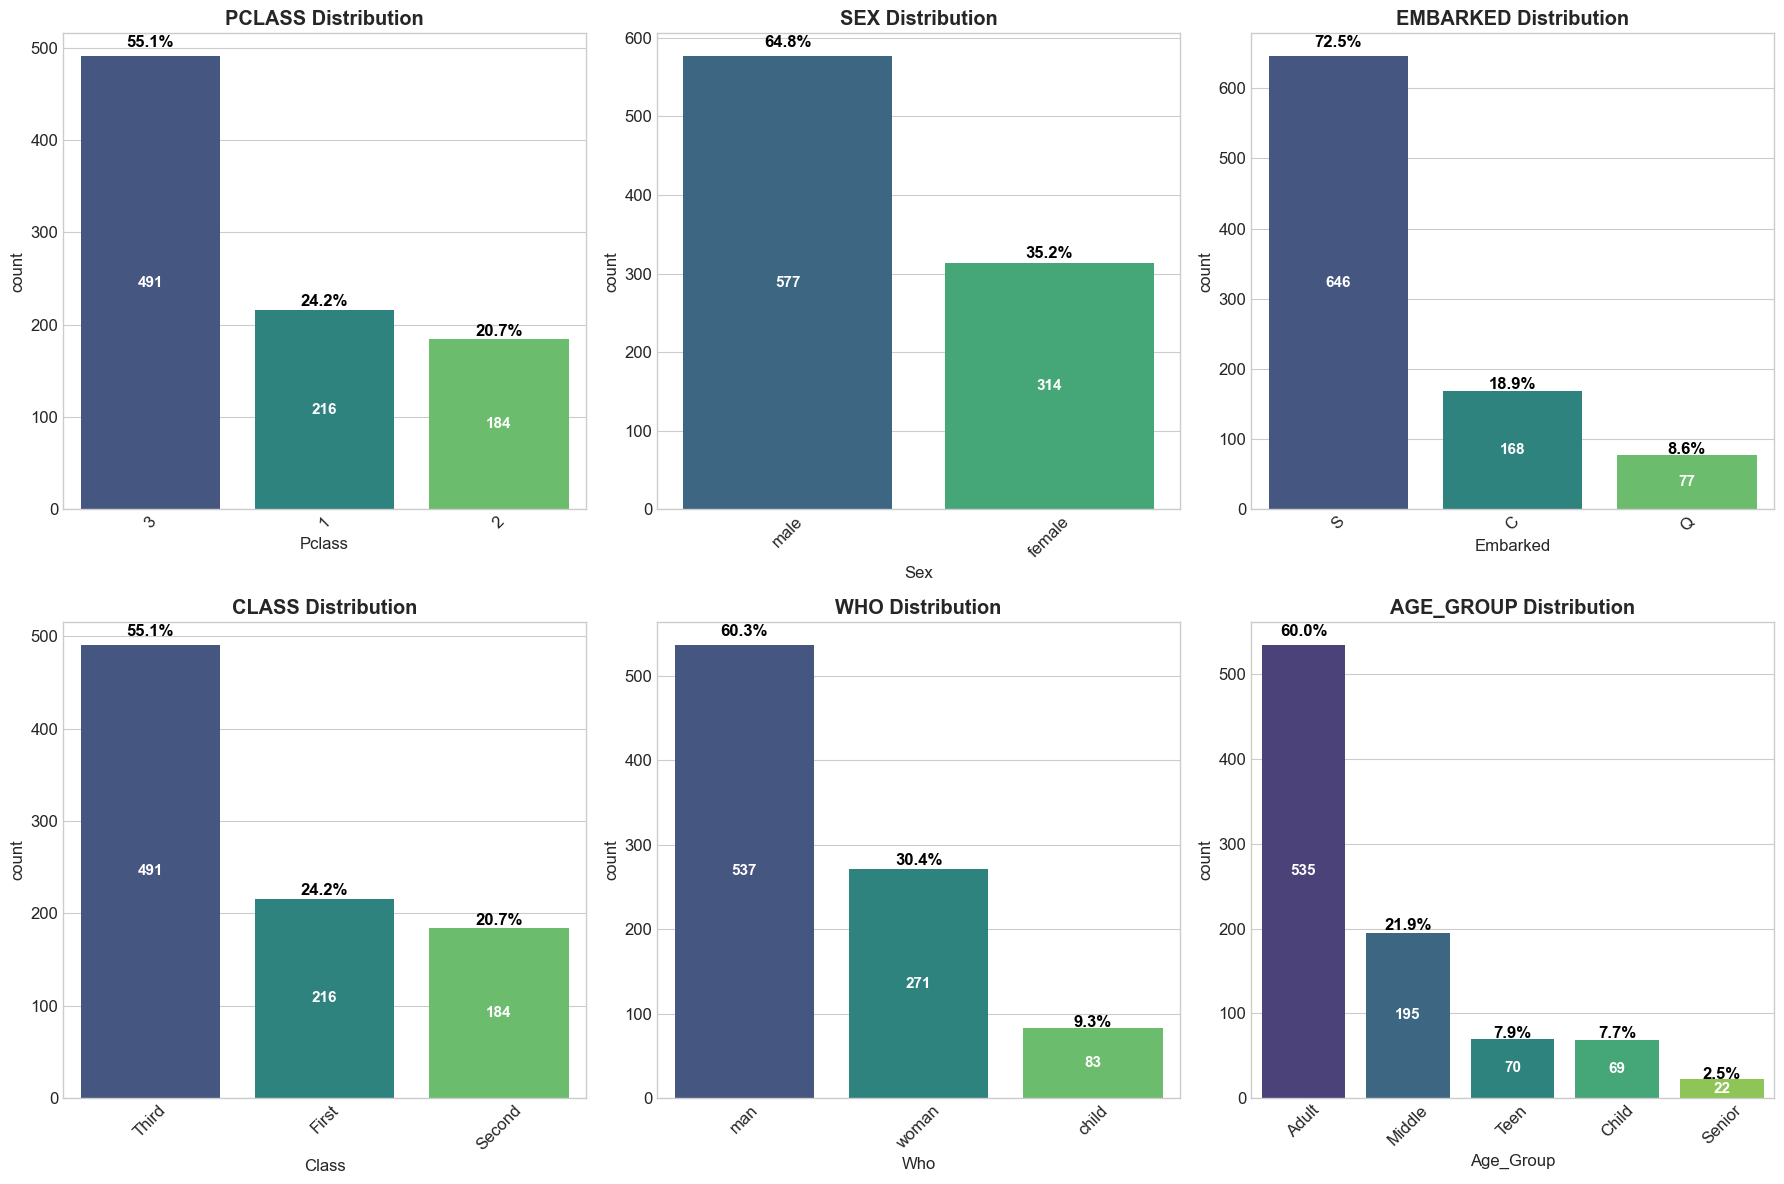

In [15]:
# Setup
categorical_vars = ['pclass', 'sex', 'embarked', 'class', 'who', 'age_group']
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten() 

# The Loop
for i, var in enumerate(categorical_vars):
    
    # Calculate stats (sorted by count)
    counts = df[var].value_counts()
    percentages = df[var].value_counts(normalize=True) * 100
    
    # Plot
    sns.countplot(data=df, x=var, ax=axes[i], palette='viridis', order=counts.index)
    
    # Styling
    axes[i].set_title(f'{var.upper()} Distribution', fontweight='bold')
    axes[i].set_xlabel(var.title())
    axes[i].tick_params(axis='x', rotation=45)
    
    # --- THE LABELS SECTION ---
    for j, (count, pct) in enumerate(zip(counts, percentages)):
        
        # Label 1: Percentage ON TOP of the bar
        # 'count + ...' puts it slightly above the bar
        axes[i].text(j, count + (count * 0.02), f'{pct:.1f}%', 
                     ha='center', fontweight='bold', color='black')
        
        # Label 2: Count INSIDE the bar
        # 'count / 2' puts it right in the vertical center
        # color='white' ensures it is readable against the dark bar
        axes[i].text(j, count / 2, f'{count}', 
                     ha='center', va='center', fontweight='bold', color='white', fontsize=11)

# Final Output
plt.tight_layout()
plt.savefig('../figures/categorical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

#### 4.1.3 Numerical Variables Analysis

We analyze the distribution of numerical features to understand their spread, central tendency, and identify potential outliers. This helps us understand the demographic and economic characteristics of passengers.

📊 NUMERICAL VARIABLES ANALYSIS


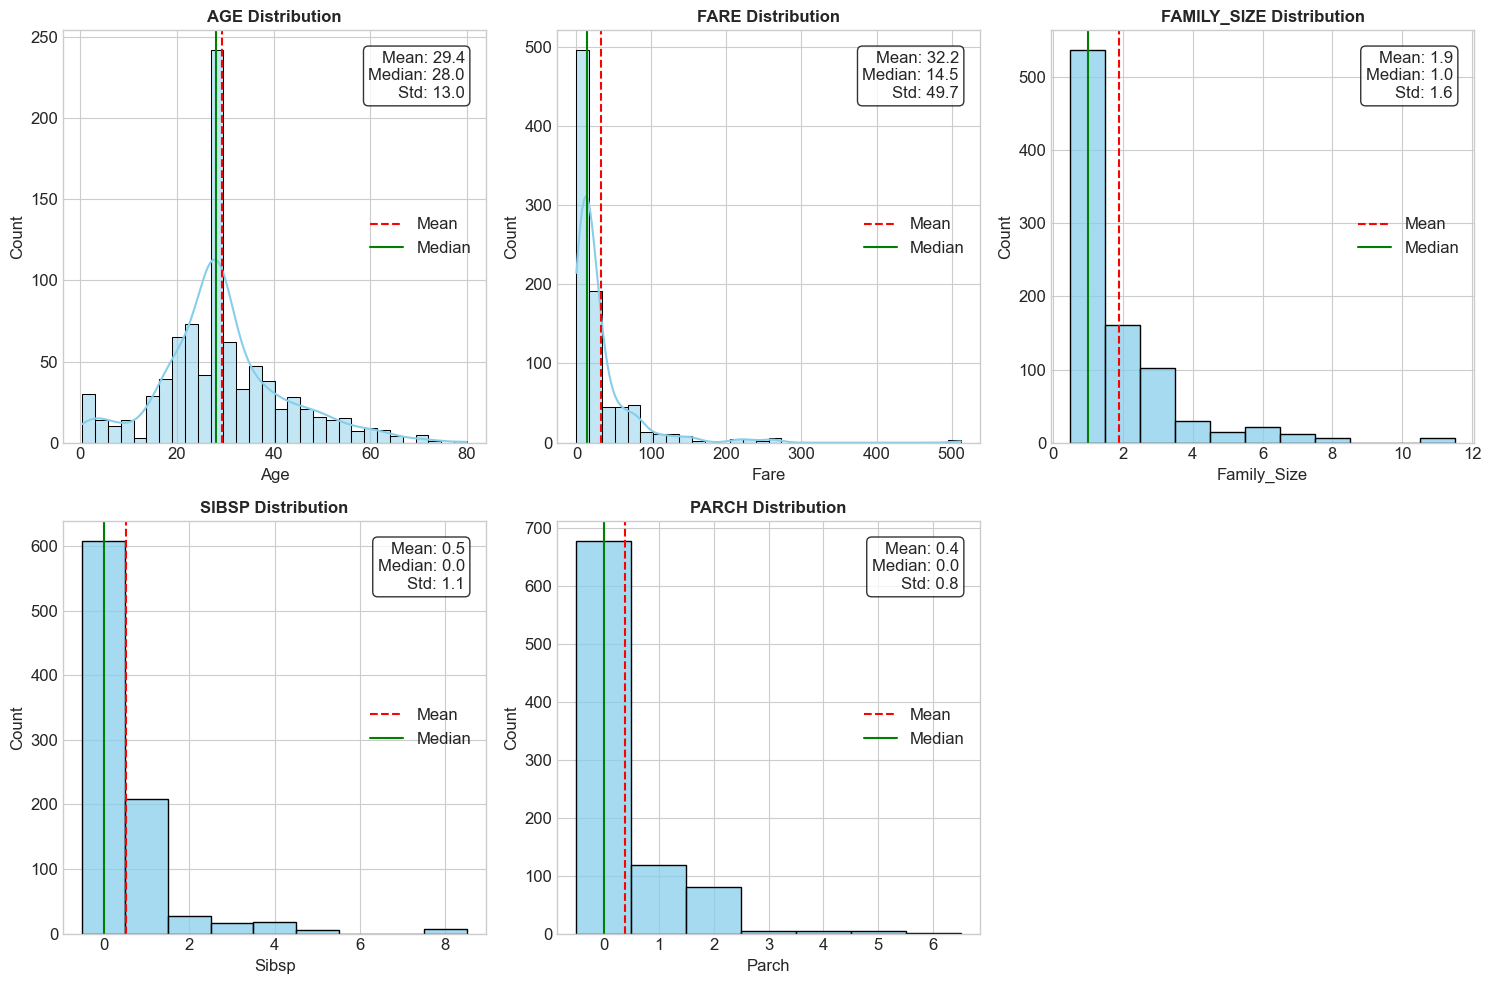

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

print("📊 NUMERICAL VARIABLES ANALYSIS")
print("=" * 31)

# Setup
numerical_vars = ['age', 'fare', 'family_size', 'sibsp', 'parch']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, var in enumerate(numerical_vars):
    
    # PLOTTING
    # discrete=True tells Seaborn to center bars on integers (0, 1, 2)
    # This prevents 'SibSp' from looking like a weird continuous blob
    is_discrete = var in ['sibsp', 'parch', 'family_size']
    
    sns.histplot(data=df, x=var, ax=axes[i], 
                 kde=not is_discrete,       # Turn off KDE for discrete vars (it looks messy)
                 discrete=is_discrete,      # Force bars to align with integers
                 bins=30 if not is_discrete else None, 
                 color='skyblue', edgecolor='black')
    
    # CALCULATE STATS
    mean_val = df[var].mean()
    median_val = df[var].median()
    std_val = df[var].std()
    
    # ADD LINES
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label='Mean')
    axes[i].axvline(median_val, color='green', linestyle='-', linewidth=1.5, label='Median')
    
    # ADD STATS BOX (The "Pro" Touch)
    # This puts a text box in the top-right corner of the plot
    stats_text = (f'Mean: {mean_val:.1f}\n'
                  f'Median: {median_val:.1f}\n'
                  f'Std: {std_val:.1f}')
    
    # transform=axes[i].transAxes means (0.95, 0.95) is top-right of the BOX, not the data
    axes[i].text(0.95, 0.95, stats_text, transform=axes[i].transAxes,
                 verticalalignment='top', horizontalalignment='right',
                 bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # Styling
    axes[i].set_title(f'{var.upper()} Distribution', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(var.title())
    axes[i].legend(loc='center right') # Move legend out of the way of our stats box

# Hide the empty subplot (6th box)
axes[5].set_visible(False)

plt.tight_layout()
plt.savefig('../figures/numerical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# 📊 4.2 Univariate Analysis Summary

## Key Insights from Individual Variable Distributions:

### 🎯 Target Variable (Survived)
- **Imbalanced dataset**: 62% died vs 38% survived
- **Baseline accuracy**: 62% (predicting all deaths)

### 👥 Passenger Demographics
- **Gender**: Majority male (65%) vs female (35%)
- **Class**: 3rd class most common (55%), then 1st (24%), 2nd (21%)
- **Embarkation**: Southampton (72%) dominant, then Cherbourg (19%), Queenstown (9%)

### 📈 Numerical Distributions
- **Age**: Relatively young population (median 29.7 years), normal distribution
- **Fare**: Highly right-skewed (median £14.45 vs mean £32.20) - indicates wealth disparity
- **Family**: Most traveled alone (SibSp & Parch median = 0)

### 🛠 Data Quality & Transformations
- **Missing values handled**: Age (median), Embarked (mode), Deck (created flag)
- **Feature engineering**: FamilySize, IsAlone created
- **Data pipeline**: Cleaned dataset saved and reloaded

## 🚀 Ready for Bivariate Analysis
Proceeding to examine relationships between variables and survival outcomes...

## 🔍 4.2. Bivariate Analysis: Relationships with Survival

### 4.1.1 Gender vs Survival - The Strongest Predictor

In [17]:
print("📊 Survival Rate by Gender:")

gender_survival = df.groupby('sex')['survived'].agg(['mean', 'count'])
gender_survival.columns = ['% Survived', 'Total People']
print(gender_survival)

📊 Survival Rate by Gender:
        % Survived  Total People
sex                             
female        0.74           314
male          0.19           577


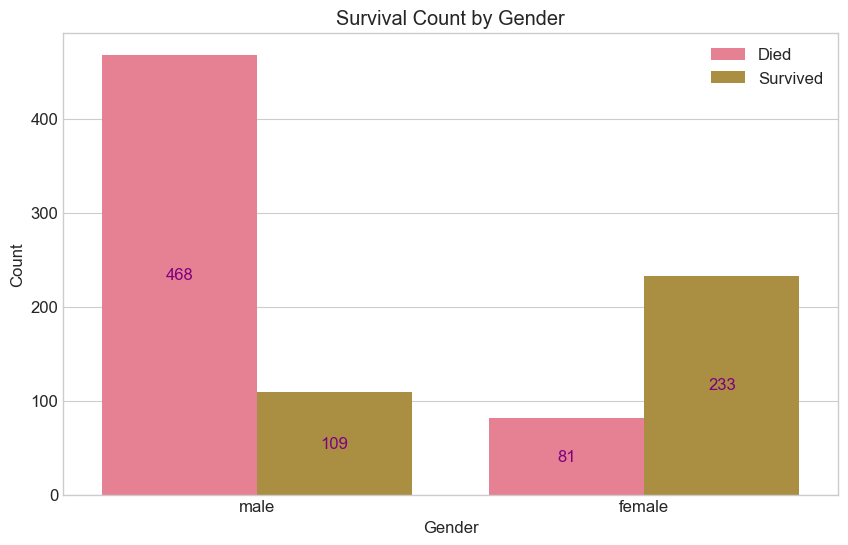

In [18]:
# Visualization
ax = sns.countplot(data=df, x='sex', hue='survived')

# Adding Numbers to Bar
for container in ax.containers:
    ax.bar_label(container, label_type='center', color='purple')

plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(['Died', 'Survived'])

plt.savefig('../figures/survival_by_gender.png', dpi=300, bbox_inches='tight')
plt.show()

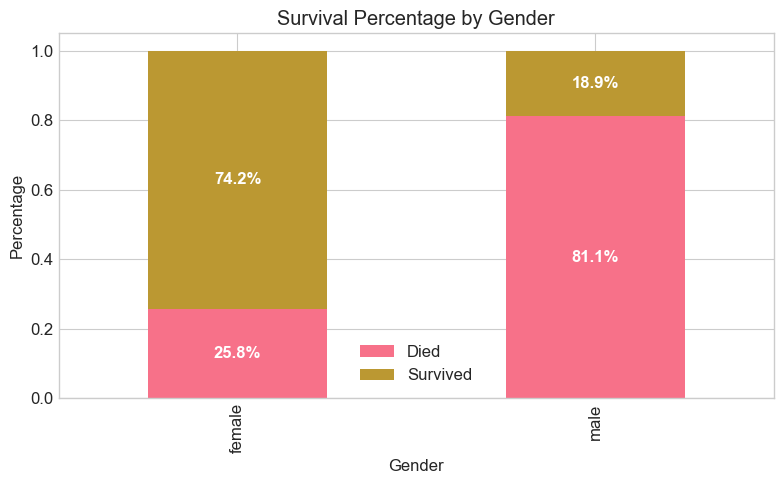

In [19]:
# Percentage stacked bar
# Create the crosstab
cross_tab = pd.crosstab(df['sex'], df['survived'], normalize='index')

# Plot and assign to 'ax'
ax = cross_tab.plot(kind='bar', stacked=True, figsize=(8, 5))

# Adding Numbers to Bar
for container in ax.containers:
    # Create labels: format as percentage (%.1f%%)
    labels = [f'{val*100:.1f}%' if val > 0 else '' for val in container.datavalues]
    
    # label_type='center' puts the text in the middle of the bar
    ax.bar_label(container, labels=labels, label_type='center', color='white', weight='bold')

# Styling
plt.title('Survival Percentage by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(['Died', 'Survived'])

# Saving and Displaying Plot
plt.tight_layout()
plt.savefig('../figures/pct_survival_by_gender.png', dpi=300, bbox_inches='tight')
plt.show()

## 4.1.2. Passenger Class vs Survival - Socioeconomic Impact

This analysis examines how passenger class (a proxy for socioeconomic status) affected survival rates. The "Women and Children First" protocol was officially followed, but in practice, class privilege played a significant role.

**Hypothesis**: Higher-class passengers had better access to lifeboats and received priority during evacuation.

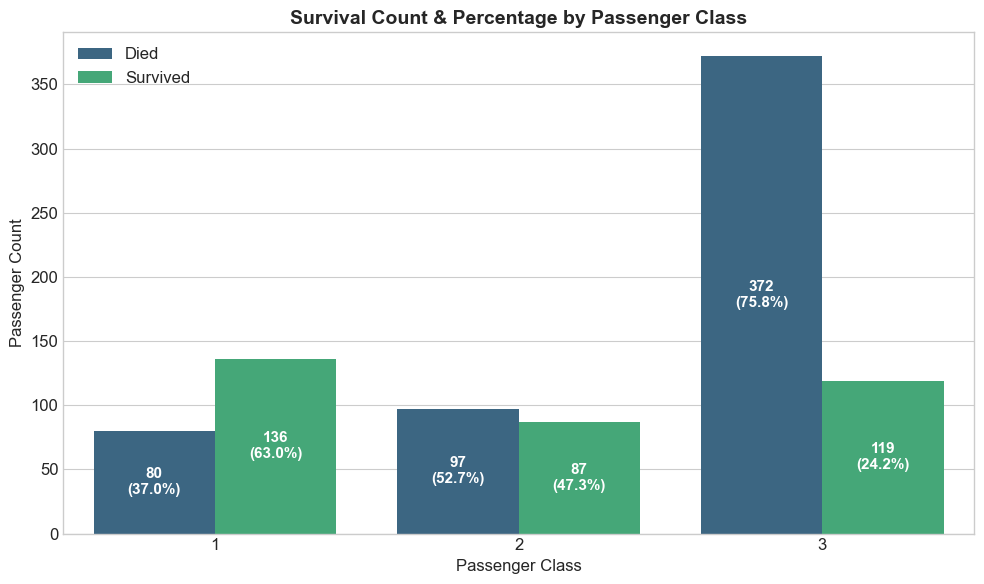

In [20]:
# Calculate Totals First
##  We need this to calculate the percentage per class (e.g., % of 1st class who survived)
class_totals = df['pclass'].value_counts().sort_index()

# Create the Plot
ax = sns.countplot(data=df, x='pclass', hue='survived', palette='viridis')

# Add Smart Labels (Count + Percentage)
# We loop through the containers (Container 0 = Died bars, Container 1 = Survived bars)
for container in ax.containers:
    
    # We create a custom label for every single bar
    labels = []
    for bar, total in zip(container, class_totals):
        height = bar.get_height()  # The count (e.g., 80)
        
        # Avoid division by zero if a class is empty
        if total > 0:
            pct = (height / total) * 100
            label = f'{int(height)}\n({pct:.1f}%)' # The \n puts the % on a new line
        else:
            label = '0'
        
        labels.append(label)

    # Apply the labels to the center of the bars
    ax.bar_label(container, labels=labels, label_type='center', 
                 color='white', fontweight='bold', fontsize=11)

# Styling
plt.title('Survival Count & Percentage by Passenger Class', fontsize=14, fontweight='bold')
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Passenger Count', fontsize=12)
plt.legend(['Died', 'Survived'], loc='upper left')

# Saving and Displaying Plot
plt.tight_layout()
plt.savefig('../figures/survival_by_class_detailed.png', dpi=300, bbox_inches='tight')
plt.show()